# Case 3. Medical text categorization
Kimmo Eemil Juhani Tolonen<br>
Last edited: 11.03.2018<br>
Metropolia University of Applied Sciences<br>
Cognitive Systems for Health Technology Applications

## 1. Objectives
"The aim of this assignment is to learn to use recurrent and 1D convolutional neural networks to
categorize medical texts.". Program should process human form of text and make prediction from trained data.<br>
First I made other notebook file, where I downloaded needed data-file from website to my computer. That program made folders and put data there. Data processing happens in this notebook next and then it goes on. Major of this code is copied from example materials, once again. I trie to edit that code and get better results.

## 2. Processing the raw data
In this chapter is data processing, where data is read from file from my computer. Then code make list from labels, which is files from "training"-files. Code count words from every file and print them in order. I tried to add real names to that list, but I didn't succeed in it, so I deleted that code.

In [18]:
import os
import time

ohsumed_dir = 'C:/Users/Kimmo/Documents/Cognitive Systems of Health Technology/ohsumed-first-20000-docs/'
train_dir = os.path.join(ohsumed_dir, 'training')
test_dir = os.path.join(ohsumed_dir, 'test')


labels = []
texts = []

t1 =time.time()
L = ['C{:02}'.format(n) for n in range(1, 23 + 1)]
# Generate a list L = ['C01', 'C02, ..., 'C023']
label_list = [label for label in os.listdir(train_dir)]

for label_type in label_list:
    dir_name = os.path.join(train_dir, label_type)
    print(label_type, len(os.listdir(dir_name)))
    for fname in os.listdir(dir_name):
        f = open(os.path.join(dir_name, fname))
        texts.append(f.read())
        f.close()
        labels.append(label_list.index(label_type))
       
t2 = time.time()
print('Time elapsed {:.2f} seconds.'.format((t2-t1)/60))

C01 423
C02 158
C03 65
C04 1163
C05 283
C06 588
C07 100
C08 473
C09 125
C10 621
C11 162
C12 491
C13 281
C14 1249
C15 215
C16 200
C17 295
C18 388
C19 191
C20 525
C21 546
C22 92
C23 1799
Time elapsed 0.06 seconds.


In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 300
max_words = 10000

# Filter removes special symbols and numbers.
tokenizer = Tokenizer(num_words = max_words, filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                               lower=True,)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 28665 unique tokens


In [20]:
len(sequences)

10433

## Shape the data and labels

In [21]:
from keras.utils.np_utils import to_categorical

data = pad_sequences(sequences, maxlen = maxlen)

labels = np.asarray(labels)
one_hot_labels = to_categorical(labels)


print('Shape of data tensor:', data.shape)
print('Shape of labels tensor:', one_hot_labels.shape)

Shape of data tensor: (10433, 300)
Shape of labels tensor: (10433, 23)


## Shuffle the data and labels

In [22]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
one_hot_labels = one_hot_labels[indices]

## Build the model
First I copied example notebook code from Sakari's Github repository and aim was to make better model than that. I run that example, but soon I realised that not work so well. Accuracy was terrible on that code.
<br>
Building the model was this time very frustrating. I tried many different solutions, but none of them gave better results than the other. I even think did I put too much different layers in the model after all. <br>
<br>
### Sunday-monday night challenges
I restarted jupyter notebook again and run all last time, then suddenly keras layers is not defined. I commented that line and continue without Conv1D. It is almost monday already and this Case was supposed to be returned at this time. I just want to run this program and return it, but now this model start to gave errors for everything "name 'L' is not defined". I can't believe this anymore! First everything works and suddenly I receive errors for everything.

In [23]:
# Build the model

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Convolution1D
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, 32, input_length=maxlen))
#model.add(layers.Conv1D(32, 67, activation='relu')) #// name 'layers' is not defined
model.add(LSTM(100))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(len(L), activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 32)           320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
_________________________________________________________________
dense_5 (Dense)              (None, 23)                46        
Total params: 376,511
Trainable params: 376,511
Non-trainable params: 0
_________________________________________________________________


## Train the model

I tried to add LSTM(100) layer and that gave again only 0.17 accuracy. Then I Change that LSTM to flatten() and train again, this model gave me that same 0.17 accuracy. I had both times only one epoch and batch size was 50. Before that I tried add many dense layers with large numbers, but that didn't gave me wanted results. Many dense layers with large numbers gave better accuracy, but validation acccuracy was critically lower than that. Best result was 0.55 accuracy, but validation was once again only 0.17.<br>
At this time even playing with number of epoches and batch sizes did not help, the results did not improve. Even that time print shows only seconds, even though I copied that from my previous case, which shows time in minutes, well now this code shows time in seconds then. I think that my 5 years old laptop is slower than before and maybe this Jupyter Notebook is a bit messy.

In [24]:
import time

t1 = time.time()
history = model.fit(data, one_hot_labels,
                   epochs = 25,
                   batch_size = 64,
                   validation_split = 0.2)
t2 = time.time()
print('Elapsed time: {:.3f} seconds'.format((t2-t1)))

Train on 8346 samples, validate on 2087 samples
Epoch 1/25
8346/8346 [==============================] - 84s 10ms/step - loss: 3.0989 - acc: 0.1650 - val_loss: 3.0656 - val_acc: 0.1792
Epoch 2/25
8346/8346 [==============================] - 51s 6ms/step - loss: 3.0385 - acc: 0.1707 - val_loss: 3.0095 - val_acc: 0.1792
Epoch 3/25
8346/8346 [==============================] - 51s 6ms/step - loss: 2.9873 - acc: 0.1707 - val_loss: 2.9619 - val_acc: 0.1792
Epoch 4/25
8346/8346 [==============================] - 51s 6ms/step - loss: 2.9442 - acc: 0.1707 - val_loss: 2.9219 - val_acc: 0.1792
Epoch 5/25
8346/8346 [==============================] - 51s 6ms/step - loss: 2.9089 - acc: 0.1707 - val_loss: 2.8897 - val_acc: 0.1792
Epoch 6/25
8346/8346 [==============================] - 51s 6ms/step - loss: 2.8805 - acc: 0.1707 - val_loss: 2.8638 - val_acc: 0.1792
Epoch 7/25
8346/8346 [==============================] - 51s 6ms/step - loss: 2.8579 - acc: 0.1707 - val_loss: 2.8434 - val_acc: 0.1792
Epoch 

In [25]:
# Testing the trained network
test_loss, test_acc = model.evaluate(data, one_hot_labels)
print('test_acc:', test_acc)

10433/10433 [==============================] - 21s 2ms/step
test_acc: 0.172433624077


## Training results

Results found here and plots.

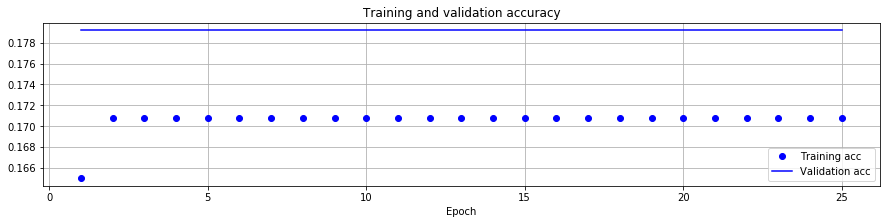

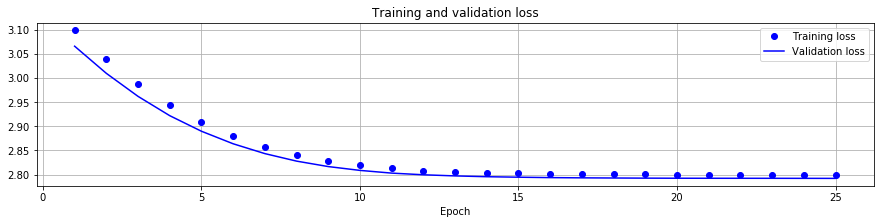

In [26]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15, 3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.grid()
plt.xlabel('Epoch')
plt.legend()


plt.figure(figsize=(15, 3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid()
plt.xlabel('Epoch')
plt.legend()

plt.show()

## Metric results

I ran out of time, this chapter remained crude and ugly. Code prints some text and predicts where chosen text is from.

In [27]:
# Calculate the predictions
predictions = model.predict(data)
y_pred = np.argmax(predictions, axis = 1)

In [28]:
# http://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, recall_score

In [29]:
# Classification results per class
print(classification_report(labels, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       423
          1       0.00      0.00      0.00       158
          2       0.00      0.00      0.00        65
          3       0.00      0.00      0.00      1163
          4       0.00      0.00      0.00       283
          5       0.00      0.00      0.00       588
          6       0.00      0.00      0.00       100
          7       0.00      0.00      0.00       473
          8       0.00      0.00      0.00       125
          9       0.00      0.00      0.00       621
         10       0.00      0.00      0.00       162
         11       0.00      0.00      0.00       491
         12       0.00      0.00      0.00       281
         13       0.00      0.00      0.00      1249
         14       0.00      0.00      0.00       215
         15       0.00      0.00      0.00       200
         16       0.00      0.00      0.00       295
         17       0.00      0.00      0.00   

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
# Confusion matrix
cm = confusion_matrix(labels, y_pred)
print(np.array2string(cm, max_line_width = 100))

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  423]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  158]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0   65]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0 1163]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  283]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  588]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  100]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  473]
 [   0    0    0    0    0    0    0    

In [31]:
# Check the text
print(texts[indices[500]])

Identification of human immunodeficiency virus hybridizing sequences in the peripheral blood of a patient with systemic lupus erythematosus.
 Systemic lupus erythematosus, a multisystemic disorder, is considered a prototype of the autoimmune diseases.
 Although its cause remains unknown, a viral etiology has been proposed.
 We report that a rapid and sensitive messenger RNA in situ hybridization technique detected hybridizing sequences to the human immunodeficiency virus type in the peripheral blood cells of a woman with systemic lupus erythematosus in whom the presence of acquired immuno-deficiency syndrome was reasonably excluded.



--------------------------------------------------------------------------------
                                          class_names  class_num
0                    Bacterial Infections and Mycoses          0
1                                      Virus Diseases          1
2                                  Parasitic Diseases          2
3                                           Neoplasms          3
4                            Musculoskeletal Diseases          4
5                           Digestive System Diseases          5
6                             Stomatognathic Diseases          6
7                          Respiratory Tract Diseases          7
8                       Otorhinolaryngologic Diseases          8
9                             Nervous System Diseases          9
10                                       Eye Diseases         10
11                 Urologic and Male Genital Diseases         11
12  Female Genital Diseases and Pregnancy Complica...         12
13       

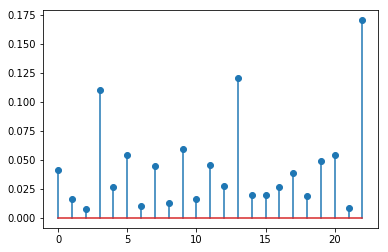

In [32]:
# Check list of class names and predicition
import pandas as pd

Classes = {
    'class_names' : ['Bacterial Infections and Mycoses', 'Virus Diseases', 'Parasitic Diseases', 'Neoplasms', 'Musculoskeletal Diseases', 
                       'Digestive System Diseases', 'Stomatognathic Diseases', 'Respiratory Tract Diseases', 'Otorhinolaryngologic Diseases',
                       'Nervous System Diseases', 'Eye Diseases', 'Urologic and Male Genital Diseases', 'Female Genital Diseases and Pregnancy Complications',
                       'Cardiovascular Diseases', 'Hemic and Lymphatic Diseases', 'Neonatal Diseases and Abnormalities', 'Skin and Connective Tissue Diseases',
                       'Nutritional and Metabolic Diseases', 'Endocrine Diseases', 'Immunologic Diseases', 'Disorders of Environmental Origin',
                       'Animal Diseases', 'Pathological Conditions, Signs and Symptoms'],
    'class_num' : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
}
df = pd.DataFrame(Classes);
print(80*'-')
print(df)
print(80*'-')
print(80*'-')

print('PREDICTION')
print('True class: ', labels[500])
print('Predicted class:', y_pred[500])
print('Predictions per class:')
print(np.array2string(predictions[500], precision = 2))

plt.stem(predictions[512])
plt.show()

## Conclusions
No matter what I did training result stayed very low, validation accuracy was every time about 0.17. My main focus was in this case was to create better model than example ones. Unfortunately that didn't happen at this time. Best results from training came with many dense layers with large numbers, training accuracy was then 0.55, but validation accuracy stayed low, only 0.17. So I draw the conclusion that this kind of result wasn't very good.<br>
<br>
I ran out of time when made this Case and results chapter remained pretty crude. When finishing this case, I still tried to make better model, but results was even worse than before. Last training result was that same 0.17, but I found out that I wrote down earlier result to my notebook (real notebook, made out of paper) at last friday: model had LSTM(100), 3 dense layers: ((784), (192), (32)), 10 epoches and batch size was 50. I can't believe this, but my notes said that training accuracy was about 0.38 and validation accuracy 0.21. Not very good either, but better than all the results of today. This is now my final results in this Case, but I am not satisfied with them.<br>
<br>
Sometimes I think wich is better, have many epoches or large batch size? Sometimes results and time of training is not depending on batch size, example today once I had batch size of 80 and then I reduced that at 20, but still training took as long as with bigger batch size. Or is it better that there is lot of epoches with small batch size? Or is layers those which determines how good results will be? I don't know right now, but this time result was always the same, sometimes training took longer and sometimes quicker, but accuracy for validation was that damn 0.17.<br>
<br>
-Kimmo